# **Proyecto 2. Análisis de la Ejecución de Ingresos Públicos en Brasil**

- Librerías y configuración

In [1]:
# Para tratamiento de datos
import numpy as np
import pandas as pd
# Para visualizaciones
import seaborn as sns 
import matplotlib.pyplot as plt
# Para generar todas las combinaciones posibles
import itertools
# Para guardar DataFrames en Excel
from pandas import ExcelWriter
# Para gestión de fechas
from datetime import datetime
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
# Configuración para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 
# importamos funciones de soporte
from src import soporte_limpieza as sl

## **Fase 1: Unión de Conjuntos de Datos**

- **Carga de archivos**

In [2]:
# cargamos los archivos
# tenemos que añadir el sep = ";" porque los archivos están separados por ; y no por ,
# añadimos el encoding = "latin-1" porque como es un archivo en portugués, pandas no lo lee bien
df_2013 = pd.read_csv("datos/datos-2013.csv", sep = ";", encoding = "latin-1")
df_2014 = pd.read_csv("datos/datos-2014.csv", sep = ";", encoding = "latin-1")
df_2015 = pd.read_csv("datos/datos-2015.csv", sep = ";", encoding = "latin-1")
df_2016 = pd.read_csv("datos/datos-2016.csv", sep = ";", encoding = "latin-1")
df_2017 = pd.read_csv("datos/datos-2017.csv", sep = ";", encoding = "latin-1")
df_2018 = pd.read_csv("datos/datos-2018.csv", sep = ";", encoding = "latin-1")
df_2019 = pd.read_csv("datos/datos-2019.csv", sep = ";", encoding = "latin-1")
df_2020 = pd.read_csv("datos/datos-2020.csv", sep = ";", encoding = "latin-1")
df_2021 = pd.read_csv("datos/datos-2021.csv", sep = ";", encoding = "latin-1")

- **Exploramos cada archivo individualmente**

In [3]:
df_2013.shape

(4498, 16)

In [4]:
reporte_2013 = sl.reporte(df_2013)
reporte_2013

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.0,int64
1,NOME ÓRGÃO SUPERIOR,0,0.0,object
2,CÓDIGO ÓRGÃO,0,0.0,int64
3,NOME ÓRGÃO,0,0.0,object
4,CÓDIGO UNIDADE GESTORA,0,0.0,int64
5,NOME UNIDADE GESTORA,0,0.0,object
6,CATEGORIA ECONÔMICA,0,0.0,object
7,ORIGEM RECEITA,0,0.0,object
8,ESPÉCIE RECEITA,0,0.0,object
9,DETALHAMENTO,0,0.0,object


No hay valores nulos y la mayoría de las columnas son de tipo object. Esto no acaba de encajar con el tipo de datos que deberían contener las columnas, es posible que las columnas de VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO' y 'PERCENTUAL REALIZADO' deban ser de tipo numérico y 'DATA LANÇAMENTO' de tipo fecha.  
Pasamos a hacer un describe de las columnas tipo object para tener un recuento de valores únicos

In [5]:
df_2013.describe(include ="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,4498,25,Ministério da Educação,1833
NOME ÓRGÃO,4498,266,Ministério da Economia - Unidades com vínculo ...,494
NOME UNIDADE GESTORA,4498,279,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,415
CATEGORIA ECONÔMICA,4498,5,Receitas Correntes,4001
ORIGEM RECEITA,4498,15,Outras Receitas Correntes,1982
ESPÉCIE RECEITA,4498,44,Receita de Serviços,978
DETALHAMENTO,4498,704,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,214
VALOR PREVISTO ATUALIZADO,4498,2788,"0,00",1625
VALOR LANÇADO,4498,52,"0,00",4447
VALOR REALIZADO,4498,3738,"0,00",704


In [6]:
df_2013.describe().T

,count,mean,std,min,25%,50%,75%,max
CÓDIGO ÓRGÃO SUPERIOR,4498.0,31729.657626,10691.972258,20000.0,25000.0,26000.0,36000.0,81000.0
CÓDIGO ÓRGÃO,4498.0,31447.970431,10798.289531,20101.0,25916.0,26292.0,35000.0,91214.0
CÓDIGO UNIDADE GESTORA,4498.0,233059.797910,141561.057724,110005.0,153173.0,160075.0,254420.0,913001.0
ANO EXERCÍCIO,4498.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0


El describe() de las columnas numéricas en este caso no aporta nada, ya que los códigos son identificadores de cada organización y el año es el mismo en todos los registros.

In [7]:
df_2014.shape

(4553, 16)

In [8]:
reporte_2014 = sl.reporte(df_2014)
reporte_2014

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.0,int64
1,NOME ÓRGÃO SUPERIOR,0,0.0,object
2,CÓDIGO ÓRGÃO,0,0.0,int64
3,NOME ÓRGÃO,0,0.0,object
4,CÓDIGO UNIDADE GESTORA,0,0.0,int64
5,NOME UNIDADE GESTORA,0,0.0,object
6,CATEGORIA ECONÔMICA,0,0.0,object
7,ORIGEM RECEITA,0,0.0,object
8,ESPÉCIE RECEITA,0,0.0,object
9,DETALHAMENTO,0,0.0,object


In [9]:
df_2014.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,4553,25,Ministério da Educação,1841
NOME ÓRGÃO,4553,267,Ministério da Economia - Unidades com vínculo ...,482
NOME UNIDADE GESTORA,4553,278,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,382
CATEGORIA ECONÔMICA,4553,5,Receitas Correntes,4095
ORIGEM RECEITA,4553,15,Outras Receitas Correntes,2050
ESPÉCIE RECEITA,4553,46,Receita de Serviços,973
DETALHAMENTO,4553,708,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,216
VALOR PREVISTO ATUALIZADO,4553,2740,"0,00",1706
VALOR LANÇADO,4553,72,"0,00",4482
VALOR REALIZADO,4553,3726,"0,00",757


In [10]:
df_2015.shape

(4523, 16)

In [11]:
reporte_2015 = sl.reporte(df_2015)
reporte_2015

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.0,int64
1,NOME ÓRGÃO SUPERIOR,0,0.0,object
2,CÓDIGO ÓRGÃO,0,0.0,int64
3,NOME ÓRGÃO,0,0.0,object
4,CÓDIGO UNIDADE GESTORA,0,0.0,int64
5,NOME UNIDADE GESTORA,0,0.0,object
6,CATEGORIA ECONÔMICA,0,0.0,object
7,ORIGEM RECEITA,0,0.0,object
8,ESPÉCIE RECEITA,0,0.0,object
9,DETALHAMENTO,0,0.0,object


In [12]:
df_2015.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,4523,25,Ministério da Educação,1803
NOME ÓRGÃO,4523,271,Ministério da Economia - Unidades com vínculo ...,481
NOME UNIDADE GESTORA,4523,288,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,385
CATEGORIA ECONÔMICA,4523,4,Receitas Correntes,4088
ORIGEM RECEITA,4523,14,Outras Receitas Correntes,2076
ESPÉCIE RECEITA,4523,41,"Multas administrativas, contratuais e judicia",962
DETALHAMENTO,4523,707,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,225
VALOR PREVISTO ATUALIZADO,4523,2648,"0,00",1785
VALOR LANÇADO,4523,83,"0,00",4441
VALOR REALIZADO,4523,3744,"0,00",711


In [13]:
df_2016.shape

(194533, 16)

In [14]:
reporte_2016 =sl.reporte(df_2016)
reporte_2016

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [15]:
df_2016.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,194533,25,Ministério da Educação,71840
NOME ÓRGÃO,194533,269,Ministério da Economia - Unidades com vínculo ...,13749
NOME UNIDADE GESTORA,194533,293,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,11126
CATEGORIA ECONÔMICA,194533,4,Receitas Correntes,186687
ORIGEM RECEITA,194533,14,Outras Receitas Correntes,70647
ESPÉCIE RECEITA,194533,44,Serviços Administrativos e Comerciais Gerais,54941
DETALHAMENTO,194533,525,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,30237
VALOR PREVISTO ATUALIZADO,194533,1835,"0,00",192639
VALOR LANÇADO,194533,1003,"0,00",193450
VALOR REALIZADO,194533,129122,"0,00",2972


In [16]:
df_2017.shape

(190479, 16)

In [17]:
reporte_2017 =sl.reporte(df_2017)
reporte_2017

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [18]:
df_2017.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,190479,24,Ministério da Educação,70837
NOME ÓRGÃO,190479,268,Ministério da Economia - Unidades com vínculo ...,14158
NOME UNIDADE GESTORA,190479,318,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,11227
CATEGORIA ECONÔMICA,190479,5,Receitas Correntes,182668
ORIGEM RECEITA,190479,15,Outras Receitas Correntes,68818
ESPÉCIE RECEITA,190479,47,Serviços Administrativos e Comerciais Gerais,51633
DETALHAMENTO,190479,516,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,29841
VALOR PREVISTO ATUALIZADO,190479,1827,"0,00",188589
VALOR LANÇADO,190479,1043,"0,00",189434
VALOR REALIZADO,190479,128532,"0,00",2800


In [19]:
df_2018.shape

(173944, 16)

In [20]:
reporte_2018 =sl.reporte(df_2018)
reporte_2018

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [21]:
df_2018.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,173944,22,Ministério da Educação,65876
NOME ÓRGÃO,173944,260,Ministério da Economia - Unidades com vínculo ...,22844
NOME UNIDADE GESTORA,173944,312,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,21206
CATEGORIA ECONÔMICA,173944,5,Receitas Correntes,165585
ORIGEM RECEITA,173944,15,Receita de Serviços,58581
ESPÉCIE RECEITA,173944,47,Serviços Administrativos e Comerciais Gerais,51444
DETALHAMENTO,173944,608,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,29257
VALOR PREVISTO ATUALIZADO,173944,1846,"0,00",172042
VALOR LANÇADO,173944,828,"0,00",173114
VALOR REALIZADO,173944,121803,"0,00",2715


In [22]:
df_2019.shape

(176828, 16)

In [23]:
reporte_2019 =sl.reporte(df_2019)
reporte_2019

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [24]:
df_2019.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,176828,20,Ministério da Educação,67104
NOME ÓRGÃO,176828,249,Ministério da Economia - Unidades com vínculo ...,23514
NOME UNIDADE GESTORA,176828,269,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,22389
CATEGORIA ECONÔMICA,176828,5,Receitas Correntes,169210
ORIGEM RECEITA,176828,15,Receita de Serviços,59957
ESPÉCIE RECEITA,176828,46,Serviços Administrativos e Comerciais Gerais,52747
DETALHAMENTO,176828,636,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,29143
VALOR PREVISTO ATUALIZADO,176828,1801,"0,00",174975
VALOR LANÇADO,176828,1105,"0,00",175649
VALOR REALIZADO,176828,124002,"0,00",3107


In [25]:
df_2020.shape

(142348, 16)

In [26]:
reporte_2020 = sl.reporte(df_2020)
reporte_2020

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [27]:
df_2020.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,142348,20,Ministério da Educação,40888
NOME ÓRGÃO,142348,254,Ministério da Economia - Unidades com vínculo ...,22686
NOME UNIDADE GESTORA,142348,270,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,21074
CATEGORIA ECONÔMICA,142348,5,Receitas Correntes,135172
ORIGEM RECEITA,142348,15,Outras Receitas Correntes,42127
ESPÉCIE RECEITA,142348,45,Serviços Administrativos e Comerciais Gerais,33271
DETALHAMENTO,142348,625,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,21029
VALOR PREVISTO ATUALIZADO,142348,1951,"0,00",140352
VALOR LANÇADO,142348,1579,"0,00",140661
VALOR REALIZADO,142348,106992,"0,00",3837


In [28]:
df_2021.shape

(134593, 16)

In [29]:
reporte_2021 = sl.reporte(df_2021)
reporte_2021

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,int64
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,int64
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,int64
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [30]:
df_2021.describe(include="O").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,134593,20,Ministério da Educação,39869
NOME ÓRGÃO,134593,256,Ministério da Economia - Unidades com vínculo ...,21403
NOME UNIDADE GESTORA,134593,268,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,20277
CATEGORIA ECONÔMICA,134593,5,Receitas Correntes,128090
ORIGEM RECEITA,134593,15,Receita de Serviços,39917
ESPÉCIE RECEITA,134593,42,Serviços Administrativos e Comerciais Gerais,34121
DETALHAMENTO,134593,600,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,19532
VALOR PREVISTO ATUALIZADO,134593,1803,"0,00",132746
VALOR LANÇADO,134593,1191,"0,00",133403
VALOR REALIZADO,134593,99376,"0,00",3404


Los 3 primeros años (2013, 2014 y 2015) no tienen valores nulos, sin embargo, del 2016 en adelante encontramos valores nulos en la columna "DATA LANÇAMENTO", son pocos, entre el 0.04 y el 0.09 %.
Mientras que en los 3 primeros años esta fecha era la misma en todos los registros, a partir de 2016 hay diferentes valores de fecha por lo que se plantea el problema de cómo rellenar esos valores en el caso de que sea necesario. 

- **Comprobamos que los tipos y nombres de las columnas son consistentes en todos los archivos**
    

Para eso comparamos las columnas "index" y "tipo_dato" de los reportes que hemos generado. 

In [31]:
# Usamos una función que compara unas columnas de una lista de reportes para comprobar si son iguales. Devuelve true si son iguales y false si encuentra alguna diferencia
reportes = [reporte_2013, reporte_2014, reporte_2015, reporte_2016, reporte_2017, reporte_2018, reporte_2019, reporte_2020, reporte_2021]
columnas = ["index", "tipo_dato"]
sl.comparar_reportes(reportes, columnas)

True

- Unión de los archivos

La función de comparació nos ha dado como resultado True, lo que indicaría que en todos los dataframe las columnas se llaman igual y tienen el mismo tipo de datos, por lo que podemos unir todos los dataframe usando concat.

In [32]:
# Unimos todos los archivos usando concat y axis = 0 para que los una de forma vertical
datos_brasil = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021], axis =0)

## **Fase 2: Limpieza de Datos**

- **Corrección de formatos**

Debemos cambiar el tipo de dato de las columnas 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO' y 'PERCENTUAL REALIZADO' de object a float.  
Para ello, debemos empezar cambiando comas por puntos para que pueda leerse como número. Usamos una función que aplica str.replace a una lista de columnas

In [33]:
# Cambiamos comas por puntos en las columnas 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO' y 'PERCENTUAL REALIZADO'.
sl.reemplazar(datos_brasil, ['VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO','PERCENTUAL REALIZADO'], ",", ".")

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.00,0.00,1297.13,0.00,31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.00,0.00,26666621.42,0.00,31/12/2013,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.00,0.00,301251.13,0.00,31/12/2013,2013
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.00,0.00,1855.58,0.00,31/12/2013,2013
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.00,0.00,52140.68,0.00,31/12/2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134588,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,TITULOS DE RESPONS.TES.NAC.-MERC.INT.-PRINC.,16940891.00,0.00,0.00,0.00,23/04/2021,2021
134589,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL",0.00,0.00,372.90,0.00,22/11/2021,2021
134590,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL",200000.00,0.00,0.00,0.00,23/04/2021,2021
134591,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL",0.00,0.00,1000000.00,0.00,10/05/2021,2021


In [34]:
# Cambiamos el tipo de dato de las columnas 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO' y 'PERCENTUAL REALIZADO' a float usando .astype
datos_brasil[['VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO','PERCENTUAL REALIZADO']] = datos_brasil[['VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO','PERCENTUAL REALIZADO']].astype(float)
# Cambiamos el tipo de la columna DATA LANÇAMENTO a datetime
datos_brasil["DATA LANÇAMENTO"] = pd.to_datetime(datos_brasil["DATA LANÇAMENTO"])
# Por último, como los códigos de las entidades no se usan en ninguna operación, los pasamos a string para que no generen ruido en los análisis estadísticos
datos_brasil[["CÓDIGO ÓRGÃO SUPERIOR", "CÓDIGO ÓRGÃO", "CÓDIGO UNIDADE GESTORA"]] = datos_brasil[["CÓDIGO ÓRGÃO SUPERIOR", "CÓDIGO ÓRGÃO", "CÓDIGO UNIDADE GESTORA"]].astype(str)


In [35]:
# Vamos a eliminar espacios a principio y fin de las columnas tipo object y además, pondremos en formato título (primera letra de cada palabra en mayúscula) todas las de NOME...
# Eliminamos espacios
datos_brasil = sl.espacios(datos_brasil,['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO']) 
# Pasamos a formato título
datos_brasil = sl.titulo(datos_brasil,['NOME ÓRGÃO SUPERIOR', 'NOME ÓRGÃO', 'NOME UNIDADE GESTORA'])
datos_brasil.sample(3)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
75892,26000,Ministério Da Educação,26431,Instituto Federal Do Piauí,158146,"Inst.Fed.De Educ.,Cienc.E Tec.Do Piaui",Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0.0,0.0,50.00,0.0,2020-08-17,2020
14881,52000,Ministério Da Defesa,52904,Fundo Do Exército,167086,Fundo Do Exercito,Receitas Correntes,"Impostos, Taxas e Contribuições de Melhoria",Taxas,"TAXAS INSPEÇÃO,CONTROLE E FISCALIZ.-MUL.JUR.",0.0,0.0,2900.00,0.0,2018-05-09,2018
8652,22000,"Ministério Da Agricultura, Pecuária E Abastec",22202,Empresa Brasileira De Pesquisa Agropecuária,135037,Embrapa-Setorial,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,OUTRAS RECEITAS-PRIMARIAS-MULTAS E JUROS,0.0,0.0,10.16,0.0,2017-10-10,2017


In [36]:
# Guardamos en formato pickle para mantener los tipos de dato
datos_brasil.to_pickle("datos/datos_brasil.pkl")

- **Tratamiento de Valores Nulos**

Comprobamos si hay valores duplicados

In [37]:
duplicados = datos_brasil[datos_brasil.duplicated()]
duplicados

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO


Obtenemos un reporte de los valores nulos

In [38]:
reporte_brasil = sl.reporte(datos_brasil)
reporte_brasil

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,object
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,object
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,object
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


La cantidad de valores nulos (todos en la columna "DATA LANÇAMENTO") es mínima, un 0.06 %. Para decidir si los podemos eliminar, vamos a analizar los valores de ingresos.

In [39]:
# creamos un dataframe filtrando los valores nulos
valores_nulos = datos_brasil[datos_brasil["DATA LANÇAMENTO"].isnull()]
# usamos .describe para obtener el resumen estadístico
valores_nulos.describe().T

,count,mean,min,25%,50%,75%,max,std
VALOR PREVISTO ATUALIZADO,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VALOR LANÇADO,578.0,4495813047.449048,6.0,572100.915,112386714.365,1499607661.085,257513407925.600006,16797766189.7325
VALOR REALIZADO,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PERCENTUAL REALIZADO,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DATA LANÇAMENTO,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
ANO EXERCÍCIO,578.0,2018.652249,2016.0,2017.0,2019.0,2020.0,2021.0,1.719045


Nos interesa el VALOR REALIZADO, que es el monto realmente recaudado. Como en este resumen es todo cero, podemos suponer que, en las fechas nulas, no se recaudó el valor correspondiente.

Vamos a calcular qué porcentaje del total supondría el VALOR LANÇADO (importe registrado) 

In [40]:
porcentaje = round((((valores_nulos["VALOR LANÇADO"].sum())/(datos_brasil["VALOR LANÇADO"].sum()))*100), 2)
porcentaje

np.float64(48.29)

La suma de VALOR LANÇADO en las fechas nulas supondría un 48.29 % del total, por lo que los valores nulos se van a mantener.

- **Detección y Corrección de Errores en Categorizaciones**

In [41]:
datos_brasil.describe(include="O").T

,count,unique,top,freq
CÓDIGO ÓRGÃO SUPERIOR,1026299,25,26000,361891
NOME ÓRGÃO SUPERIOR,1026299,25,Ministério Da Educação,361891
CÓDIGO ÓRGÃO,1026299,291,25000,119811
NOME ÓRGÃO,1026299,287,Ministério Da Economia - Unidades Com Vínculo ...,119811
CÓDIGO UNIDADE GESTORA,1026299,364,170013,108481
NOME UNIDADE GESTORA,1026299,356,Setorial Orcamentaria E Financeira / Me,108481
CATEGORIA ECONÔMICA,1026299,5,Receitas Correntes,979596
ORIGEM RECEITA,1026299,15,Outras Receitas Correntes,322907
ESPÉCIE RECEITA,1026299,63,Serviços Administrativos e Comerciais Gerais,278157
DETALHAMENTO,1026299,1886,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039


Se puede ver que hay discrepancias entre el número de valores únicos de CÓDIGO ÓRGÃO (291) y  NOME ÓRGÃO (287) y CÓDIGO UNIDADE GESTORA (364) NOME UNIDADE GESTORA (356). Como en ambos casos hay más códigos que nombres y no hay valores nulos, esto puede deberse a que hay nombres que tienen más de un código asignado. Vamos a comprobar si hay nombres con más de un código

In [42]:
# Agrupamos por NOME ÓRGÃO y contamos los códigos únicos usando .nunique(), que nos devuelve el número de valores únicos.
conteo_codigos_organo = datos_brasil.groupby('NOME ÓRGÃO')['CÓDIGO ÓRGÃO'].nunique().reset_index() 
# Filtramos para que solo muestre las filas que tengan un número de valores únicos >1
conteo_codigos_organo[conteo_codigos_organo['CÓDIGO ÓRGÃO'] > 1]

,NOME ÓRGÃO,CÓDIGO ÓRGÃO
7,Agência Nacional De Transportes Aquaviários,2
121,Fundo Nacional Antidrogas,2
131,Fundo Nacional Do Idoso,2
133,Fundo Nacional Para A Criança E O Adolescente,2


Podemos ver que hay 4 órganos que tienen 2 códigos cada uno

In [43]:
# Ahora agrupamos por NOME UNIDADE GESTORA y contamos los códigos únicos usando .nunique(), que nos devuelve el número de valores únicos.
conteo_codigos_unidad = datos_brasil.groupby('NOME UNIDADE GESTORA')['CÓDIGO UNIDADE GESTORA'].nunique().reset_index() 
# Filtramos para que solo muestre las filas que tengan un número de valores únicos >1
conteo_codigos_unidad[conteo_codigos_unidad['CÓDIGO UNIDADE GESTORA'] > 1]

,NOME UNIDADE GESTORA,CÓDIGO UNIDADE GESTORA
8,Agencia Nacional De Transportes Aquaviarios,2
60,Coordenacao-Geral De Orcamento E Financas,2
63,Coordenacao-Geral De Recursos Logisticos,2
79,Diretoria De Financas-Sistema Para O Pais/Mm,2
153,Fundo Nacional Antidrogas,2
162,Fundo Nacional Do Idoso,2
164,Fundo Nacional Para A Crianca E O Adolescente,2
292,Setorial Prog.Orcamentaria E Financeira-Sfb,2


En este caso hay más nombres con 2 códigos.

Vamos a filtrar por uno de los órganos que tienen más de un código asignado para ver si puede ser un error.

In [44]:
datos_brasil[datos_brasil['NOME ÓRGÃO'].isin(["Fundo Nacional Do Idoso"])]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
3784,57000,"Ministério Das Mulheres, Igualdade Racial, Da",64902,Fundo Nacional Do Idoso,207001,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências dos Municípios e de suas Entid,Transferências dos Municípios e de suas Entid,3000000.0,0.0,5850000.00,195.0,2013-12-31,2013
3789,57000,"Ministério Das Mulheres, Igualdade Racial, Da",64902,Fundo Nacional Do Idoso,207001,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências de Outras Instituições Pública,Transferências de Outras Instituições Pública,0.0,0.0,6350.00,0.0,2013-12-31,2013
3794,57000,"Ministério Das Mulheres, Igualdade Racial, Da",64902,Fundo Nacional Do Idoso,207001,Fundo Nacional Do Idoso,Receitas Correntes,Receita Patrimonial,Valores Mobiliários,REMUNERACAO DE DEPOSITOS BANCARIOS,0.0,0.0,128857.04,0.0,2013-12-31,2013
3811,57000,"Ministério Das Mulheres, Igualdade Racial, Da",64902,Fundo Nacional Do Idoso,207001,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências de Outras Instituições Pública,Transferências de Outras Instituições Pública,1469.0,0.0,4000.00,272.0,2014-12-31,2014
3815,57000,"Ministério Das Mulheres, Igualdade Racial, Da",64902,Fundo Nacional Do Idoso,207001,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências dos Municípios e de suas Entid,Transferências dos Municípios e de suas Entid,456960.0,0.0,9036635.04,1978.0,2014-12-31,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109560,81000,"Ministério Da Mulher, Família E Direitos Huma",30914,Fundo Nacional Do Idoso,307002,Fundo Nacional Do Idoso,Receitas Correntes,Receita Patrimonial,Valores Mobiliários,REMUNERACAO DE DEPOSITOS BANCARIOS-PRINCIPAL,0.0,0.0,9360.66,0.0,2021-02-09,2021
109561,81000,"Ministério Da Mulher, Família E Direitos Huma",30914,Fundo Nacional Do Idoso,307002,Fundo Nacional Do Idoso,Receitas Correntes,Receita Patrimonial,Valores Mobiliários,REMUNERACAO DE DEPOSITOS BANCARIOS-PRINCIPAL,0.0,0.0,13131.93,0.0,2021-09-17,2021
109562,81000,"Ministério Da Mulher, Família E Direitos Huma",30914,Fundo Nacional Do Idoso,307002,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências de Pessoas Físicas,TRANSFERENCIAS DE PESSOAS FISICAS-PRINCIPAL,0.0,0.0,1621657.68,0.0,2021-08-03,2021
109563,81000,"Ministério Da Mulher, Família E Direitos Huma",30914,Fundo Nacional Do Idoso,307002,Fundo Nacional Do Idoso,Receitas Correntes,Transferências Correntes,Transferências de Pessoas Físicas,TRANSFERENCIAS DE PESSOAS FISICAS-PRINCIPAL,0.0,0.0,300.00,0.0,2021-03-29,2021


Hemos filtrado por "Fundo Nacional Do Idoso" y en el resultado podemos ver que tiene dos códigos, pero parece deberse a que depende de dos órganos superiores o que cada órgano superior tiene un órgano llamado así, se da el mismo caso con la unidad gestora:  
    1. 81000 - Ministério Da Mulher, Família E Direitos Huma... -- 30914 Fundo Nacional Do Idoso -- 307002 Fundo Nacional Do Idoso  
    2. 57000 - Ministério Das Mulheres, Igualdade Racial, Da	... -- 64902 Fundo Nacional Do Idoso -- 207001 Fundo Nacional Do Idoso  

Dado que no conocemos las interdependencias entre órganos superiores, órganos y unidades gestoras, no tenemos forma de saber si estos códigos son correctos o no, por lo que, en caso de ser necesario, se usará el nombre de la entidad correspondiente.

Comprobamos el formato de las categorías econónicas. Extraemos los valores únicos y, como solo hay 5, podemos comprobar visualmente si hay errores.

In [45]:
datos_brasil["CATEGORIA ECONÔMICA"].unique()

array(['Receitas Correntes', 'Receitas de Capital',
       'Receitas Correntes - intra-orçamentárias', 'Sem informação',
       'Receitas de Capital - intra-orçamentárias'], dtype=object)

Parece que no hay inconsistencias en la categoría económica.

## **Fase 3: Análisis Exploratorio de Datos (EDA)**

- **Distribución de Ingresos por Categoría Económica:**

   - Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

   - Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

In [46]:
# Para analizar las categorías de ingresos agrupamos por CATEGORIA ECONÔMICA y sumamos el VALOR REALIZADO, ya que es el ingreso real. 
# Añadimos .reset_index(name = "ingreso realizado") para darle nombre a la columna y ordenamos por valores de forma descencente (ascending = False)
ingresos_categoria = datos_brasil.groupby("CATEGORIA ECONÔMICA")["VALOR REALIZADO"].sum().sort_values(ascending=False).reset_index(name = "ingreso realizado")
ingresos_categoria

,CATEGORIA ECONÔMICA,ingreso realizado
0,Receitas Correntes,1.290934e+13
1,Receitas de Capital,1.240714e+13
2,Receitas Correntes - intra-orçamentárias,2.926518e+11
3,Receitas de Capital - intra-orçamentárias,2.825084e+10
4,Sem informação,4.657000e+01


In [47]:
# Calculamos el porcentaje que supone cada categoría sobre los ingresos totales (suma de VALOR REALIZADO de todo el dataframe datos_brasil) y lo añadimos como columna nueva del dataframe ingresos_categoria
ingresos_categoria["porcentaje"] = round(((ingresos_categoria["ingreso realizado"]/datos_brasil["VALOR REALIZADO"].sum())*100),2)
ingresos_categoria

,CATEGORIA ECONÔMICA,ingreso realizado,porcentaje
0,Receitas Correntes,1.290934e+13,50.35
1,Receitas de Capital,1.240714e+13,48.39
2,Receitas Correntes - intra-orçamentárias,2.926518e+11,1.14
3,Receitas de Capital - intra-orçamentárias,2.825084e+10,0.11
4,Sem informação,4.657000e+01,0.00


Es evidente que las categorías "Receitas Correntes" y "Receitas de Capital" son las más significativas, ya que entre las dos suponen el 98.74 % de todos los ingresos, siendo "Receitas Correntes", con el 50.35% la que más participa, aunque la diferencia con "Receitas de Capital" es de apenas un 2%.

In [48]:
# Añadimos una nueva columna al df datos_brasil con el cálculo de la diferencia entre ingresos previstos y realizados por cada categoría.
# Usamos las columnas "VALOR PREVISTO ATUALIZADO" como ingreso previsto y "VALOR REALIZADO" para el ingreso previsto.
datos_brasil["diferencia_ingresos"] = datos_brasil["VALOR PREVISTO ATUALIZADO"] - datos_brasil["VALOR REALIZADO"]
sl.reporte(datos_brasil)

,index,valores_nulos,porcentaje_nulos,tipo_dato
0,CÓDIGO ÓRGÃO SUPERIOR,0,0.00,object
1,NOME ÓRGÃO SUPERIOR,0,0.00,object
2,CÓDIGO ÓRGÃO,0,0.00,object
3,NOME ÓRGÃO,0,0.00,object
4,CÓDIGO UNIDADE GESTORA,0,0.00,object
5,NOME UNIDADE GESTORA,0,0.00,object
6,CATEGORIA ECONÔMICA,0,0.00,object
7,ORIGEM RECEITA,0,0.00,object
8,ESPÉCIE RECEITA,0,0.00,object
9,DETALHAMENTO,0,0.00,object


In [49]:
# Para analizar la diferencia media por categoría de ingresos agrupamos por CATEGORIA ECONÔMICA y calculamos la media de "diferencia_ingresos"
# Añadimos .reset_index(name = "diferencia_media") para darle nombre a la columna y ordenamos por valores de forma descencente (ascending = False)
diferencia_categoria = datos_brasil.groupby("CATEGORIA ECONÔMICA")["diferencia_ingresos"].mean().astype(int).sort_values(ascending=False).reset_index(name = "diferencia_media")
diferencia_categoria


,CATEGORIA ECONÔMICA,diferencia_media
0,Receitas de Capital,69020346
1,Receitas Correntes,653518
2,Sem informação,0
3,Receitas Correntes - intra-orçamentárias,-71867
4,Receitas de Capital - intra-orçamentárias,-183604465


Que la diferencia media tenga un valor positivo implicaría que se ha ingresado menos de lo que estaba previsto. Eso se da en las Receitas de Capital (en torno a 69 millones menos de lo esperado) y las Receitas Correntes (menos de un millón de diferencia).  
En cambio, en el resto de categorías se ha ingresado más de lo previsto, menos en Sem informação, que no parece haber diferencias. En las Receitas Correntes - intra-orçamentárias se ha ingresado unos 71000 más de lo previsto y la mayor diferencia está en Receitas de Capital - intra-orçamentárias, que ha ingresado en torno a 183 millones más de lo previsto.

- **Análisis Temporal:**

   - Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.

In [50]:
# creamos 2 nuevas columnas a partir de "DATA LANÇAMENTO": una que muestre la fecha como mes-año y otra solo con el año
datos_brasil["mes_año"] = datos_brasil["DATA LANÇAMENTO"].dt.strftime('%m-%Y')
datos_brasil['año'] = datos_brasil['DATA LANÇAMENTO'].dt.year
datos_brasil.sample()

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO,diferencia_ingresos,mes_año,año
130530,26000,Ministério Da Educação,26422,Instituto Federal Catarinense,158125,Instituto Federal Catarinense - Reitoria,Receitas Correntes,Receita Agropecuária,Receita Agropecuária,RECEITA AGROPECUÁRIA-PRINCIPAL,0.0,0.0,6191.3,0.0,2019-08-01,2019,-6191.3,08-2019,2019.0


In [51]:
# agrupamos por la nueva columna "mes_año" y por "CATEGORIA ECONÔMICA" y sumamos los ingresos ('VALOR REALIZADO')
ingresos_tiempo_categoria = datos_brasil.groupby(["mes_año", "CATEGORIA ECONÔMICA"])["VALOR REALIZADO"].sum().reset_index()
ingresos_tiempo_categoria.sample()

,mes_año,CATEGORIA ECONÔMICA,VALOR REALIZADO
39,02-2019,Sem informação,0.0


<Axes: xlabel='mes_año', ylabel='VALOR REALIZADO'>

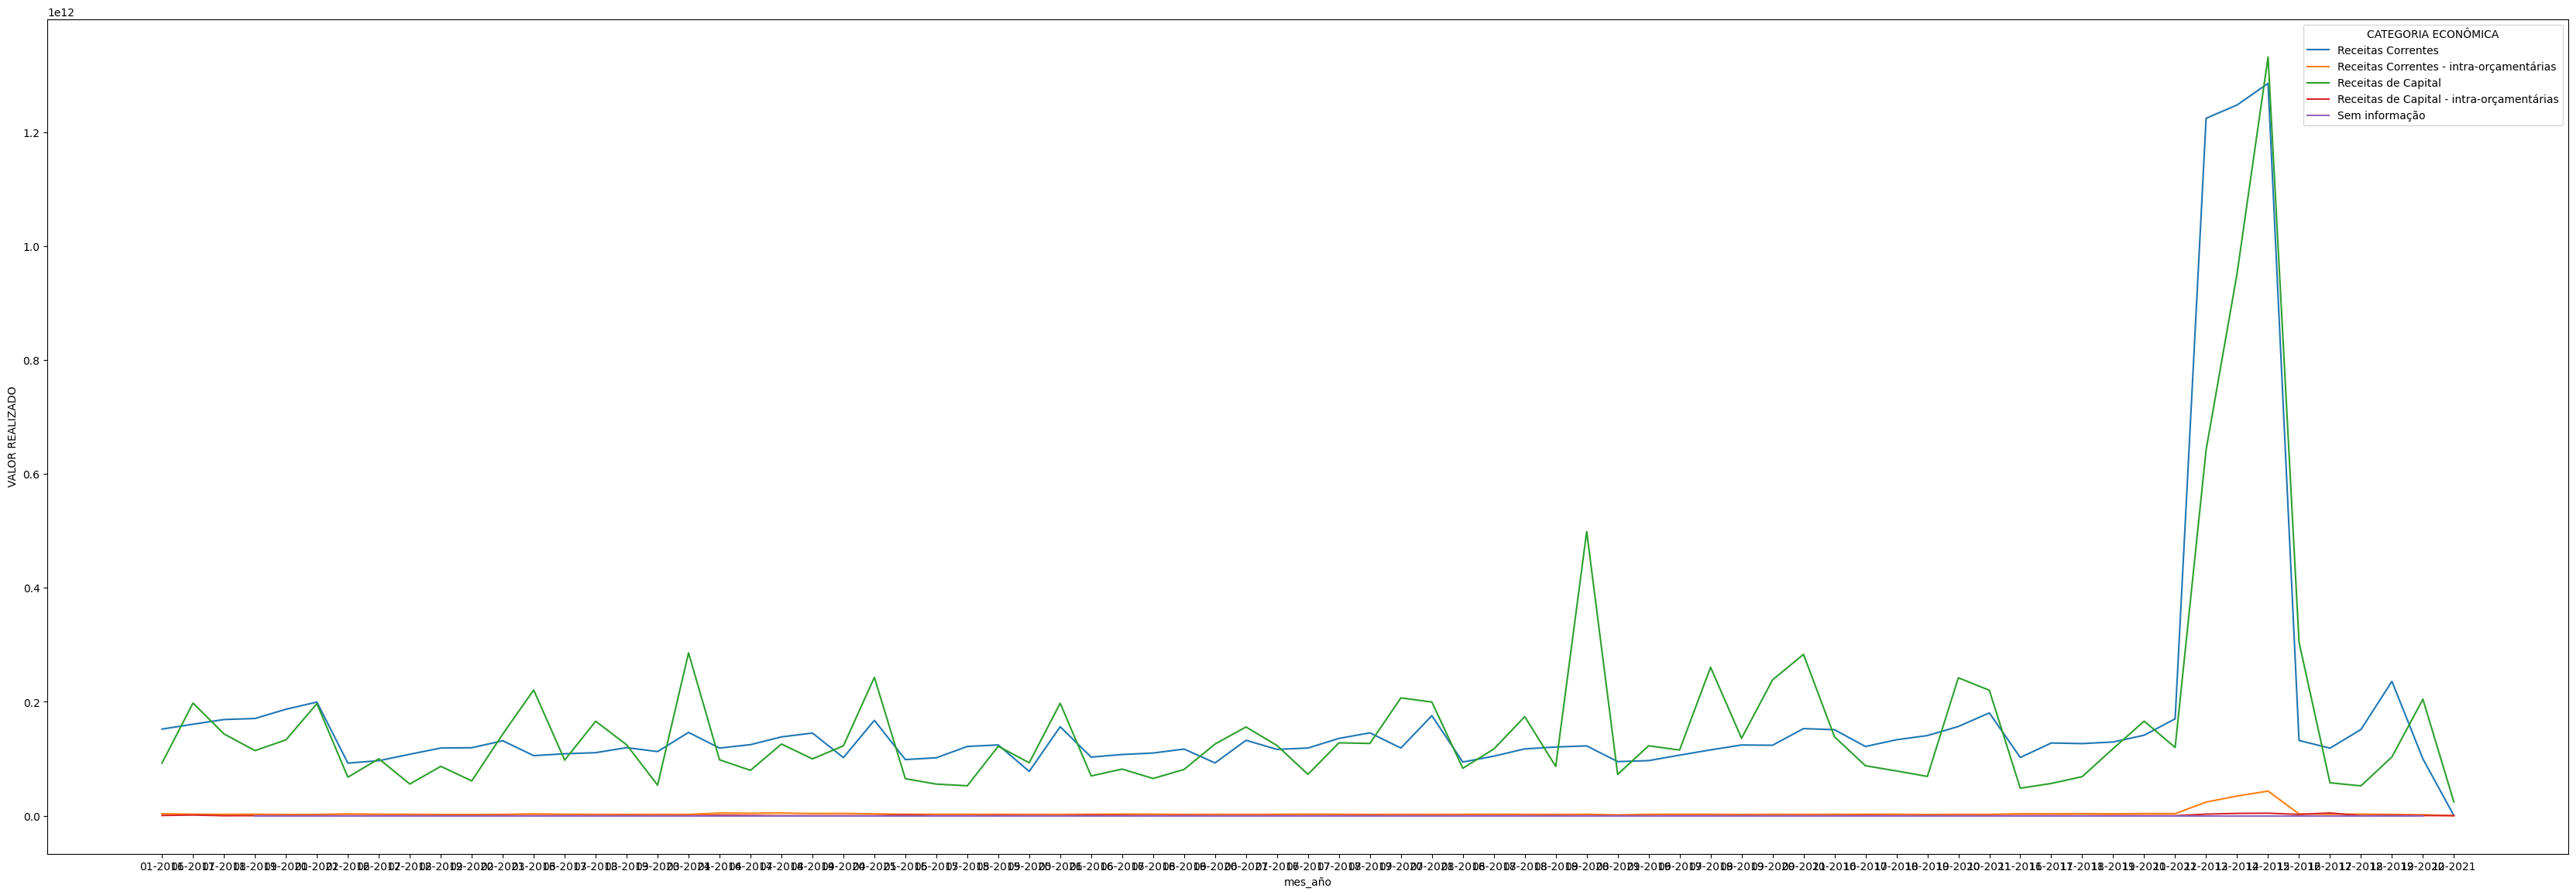

In [52]:
# Usamos un lineplot para representar los ingresos por categorías a lo largo del tiempo
plt.figure(figsize=(42, 14))
sns.lineplot(data=ingresos_tiempo_categoria, x="mes_año", y="VALOR REALIZADO", hue ="CATEGORIA ECONÔMICA")

Como, a pesar de haber agrupado por meses de cada año, hay una gran cantidad de fechas, no se puede apreciar la tendencia. Sí que se observa que las categorías "Receitas de Capital" y "Receitas Correntes" alcanzan valores más altos, lo que concuerda con el cálculo anterior que mostraba que estas dos categorías agrupan el 98% de los ingresos.  
Se puede ver que hay un pico destacado cerca de los últimos años que afecta incluso a la categoría "Receitas Correntes - intra-orçamentárias". Como no se aprecia la fecha, vamos a representar cada año por separado.

In [53]:
# añadimos "año" a la agrupación anterior y sumamos los valores
ingresos_año_categoria = datos_brasil.groupby(["mes_año", "año", "CATEGORIA ECONÔMICA"])["VALOR REALIZADO"].sum().reset_index()
ingresos_año_categoria.sample()

,mes_año,año,CATEGORIA ECONÔMICA,VALOR REALIZADO
306,12-2014,2014.0,Receitas de Capital,9.521063e+11


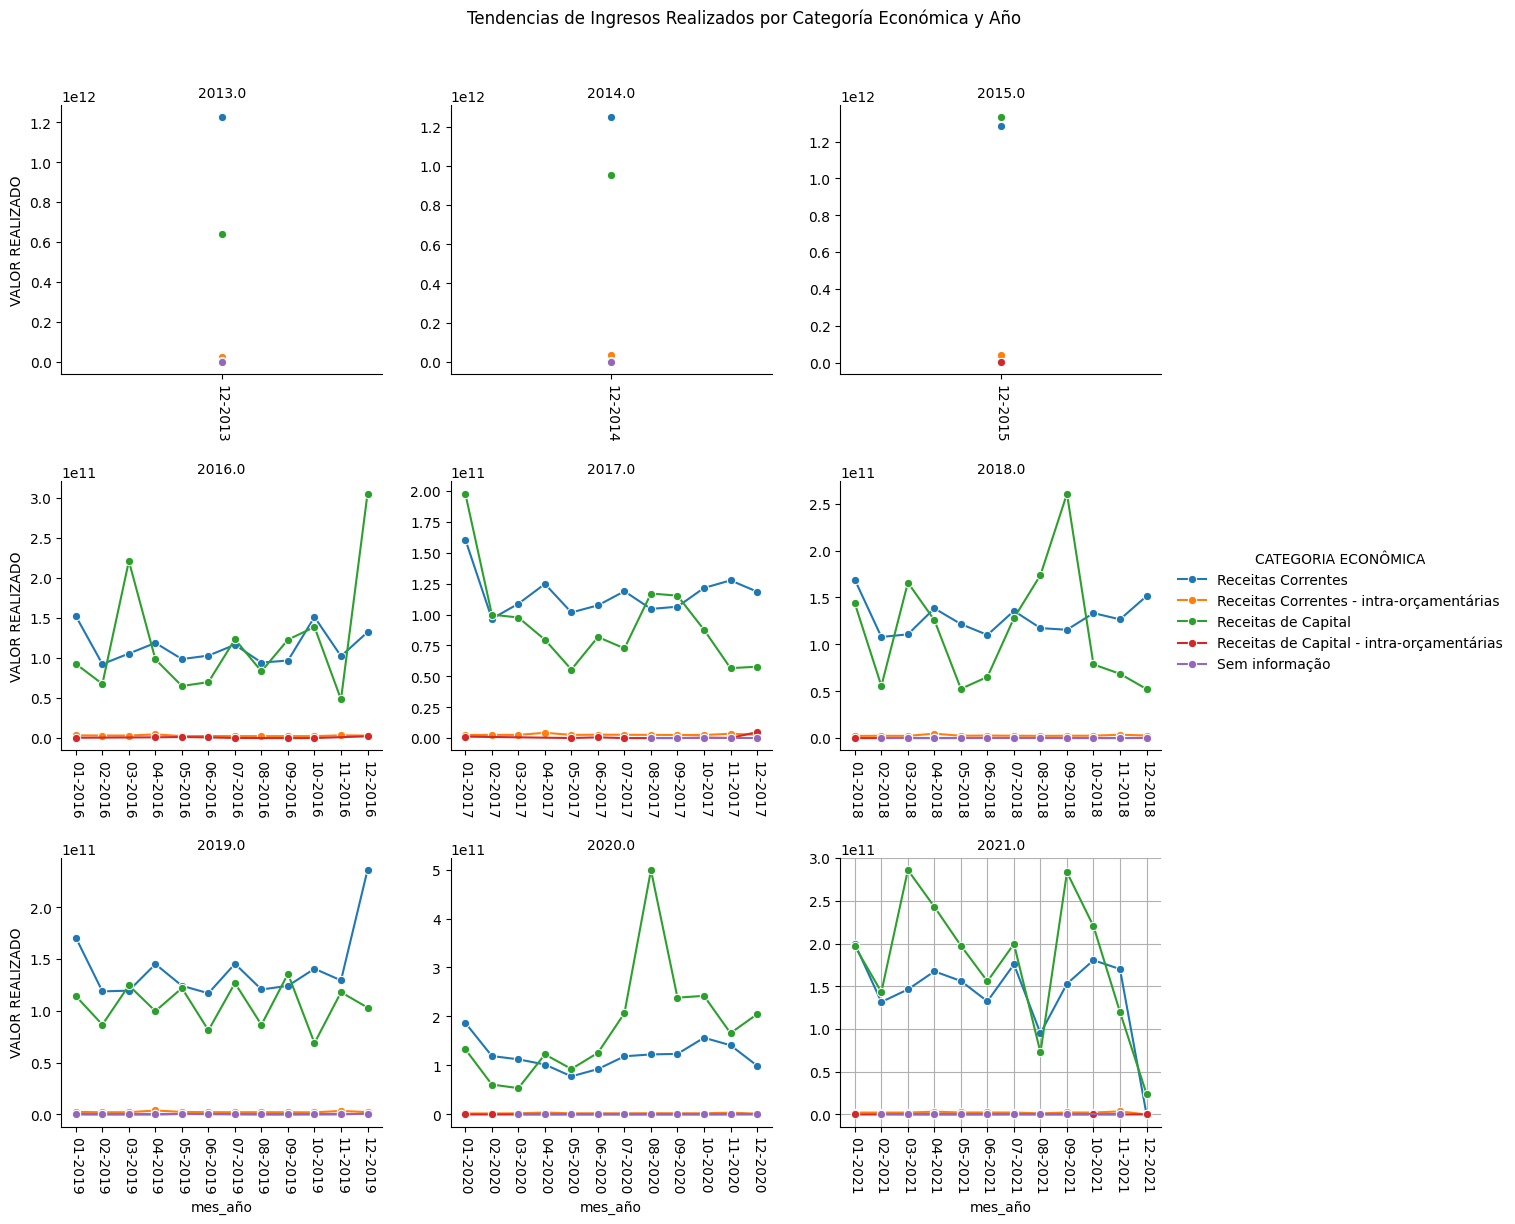

In [54]:
# Usamos FacetGrid para crear varios subplots que representen los ingresos por categoría para cada año
g = sns.FacetGrid(ingresos_año_categoria, col="año", hue='CATEGORIA ECONÔMICA', col_wrap=3, height=4, sharey=False, sharex=False) 
# Representamos el df obtenido de la última agrupación, col indica las variables que van a definir los subplots, en este caso queremos el año,
# como queremos que represente las diferentes categorías económicas, lo indicamos en hue, 
# después se indica el número de columnas (col_wrap), la altura de cada gráfico y si los ejes x y son compartidos, en este caso no lo son (False)
g.map(sns.lineplot, 'mes_año', 'VALOR REALIZADO', marker='o') 
# Indicamos que queremos un lineplot que represente el "mes_año" en el eje x y el "VALOR REALIZADO" en el y
g.add_legend() 
g.set_titles("{col_name}") 
for ax in g.axes.flatten(): 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=270) # rotamos 270º para que aparezca el mes en primer lugar y en vertical
ax.grid(True) 
plt.subplots_adjust(top=0.9, hspace=0.4,) # ajustamos el espacio para el título en 0.9 y el espacio vertical entre gráficos en 0.4 para que se vean las etiquetas del eje x
g.fig.suptitle('Tendencias de Ingresos Realizados por Categoría Económica y Año') 
plt.show()

En los 3 primeros años de registros, todos los ingresos se producen el 31 de diciembre, por eso en los gráficos solamente aparecen puntos.  

En 2016 los ingresos debidos a Receitas Correntes se mantienen más o menos estables, entre 100000 M y 150000 M, aunque parece que cada 3 meses hay una ligera subida, pudiendo ser algún tipo de cierre contable; mientras que los ingresos debidos a Receitas de Capital, presentan dos picos importantes, en marzo y en diciembre, mientras que en el resto del año se mantienen relativamente estables entre 50000 M y 150000 M.  

En 2017 continua el pico del año anterior en Receitas de Capital en enero, tras lo que cae a valores que oscilan entre 50000 M y 125000 M el resto del año. En cuanto a los ingresos por Recitras Correntes, en enero hay un ligero pico, que parece continuar desde el diciembre anterior para caer a valores estables entre 100000 M y 125000 M, se mantiene el patrón de subidas cada 3 meses.

En 2018 los ingresos por Receitas Correntes se mantienen a lo largo del año ente 100000 M y 160000 M, con el patrón de subidas trimestrales mientras que los ingresos por Receitas de Capital presentan mayores oscilaciones, con un pico importante en septiembre (sube hasta más de 250000 M), mientras que el resto del año oscila entre 50000 M y 150000 M.

En 2019, los ingresos por Receitas Correntes mantienen el patrón de subidas trimestrales (aunque se mantienen entre 120000 M y 150000 M), destacando valores altos en enero (sube hasta 170000 M) y en diciembre, que se alcanzan valores superiores a 250000 M. Este año los ingresos por Receitas de Capital son en general menores que por Receitas Correntes y presentan un patrón de subidas en los meses impares y bajadas en los pares.

En 2020 los ingresos de Receitas Correntes se mantienen entre 100000 y 20000 M, mientras que los ingresos por Receitas de Capital se mantienen por debajo hasta abril, que empiezan a superar a los ingresos por Receitas Correntes destacanco el pico de agosto, que sube hasta 500000 M, pudiendo ser resultado del fin del confinamiento debido a la situacuón sanitaria. 

En 2021 hay oscilaciones en ambos tipos de ingresos, aunque los debidos a Receitas Correntes son más estables, exceptuando las fuertes caídas en agosto y diciembre. Los ingresos por Receitas de Capital son más inestables, aunque superiores a los otros. Presentan dos fuertes subidas, en marzo y en octubre, que se aproximan a 300000 M y dos fuertes bajadas en agosto y diciembre, coincidiendo con las bajadas de los ingresos por Receitas Correntes. Es posible que esos dos meses ocurriera un suceso importante.  

Dado que las Receitas Correntes son los ingresos que el gobierno recibe de manera regular, como impuestos, tasas y contribuciones, es normal que sean estables a lo largo del año. Sin embargo, las Receitas de Capital son los ingresos provenientes de operaciones que afectan el patrimonio del gobierno incluyendo la venta de bienes, concesiones, y la contratación de préstamos, lo que implicaría que no tendrían un patrón temporal.

- **Identificación de Discrepancias:**

   - Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

Anteriormente habíamos calculado la diferencia media por categoría, calculada como "VALOR PREVISTO ATUALIZADO" - "VALOR REALIZADO". Y teníamos que las categorías con mayores diferencias medias eran Receitas de Capital - intra-orçamentárias (que han ingresado más de lo previsto) y Receitas de Capital (que ingresan menos de lo previsto).

In [55]:
diferencia_categoria

,CATEGORIA ECONÔMICA,diferencia_media
0,Receitas de Capital,69020346
1,Receitas Correntes,653518
2,Sem informação,0
3,Receitas Correntes - intra-orçamentárias,-71867
4,Receitas de Capital - intra-orçamentárias,-183604465


In [56]:
# Vamos a comprobar la diferencia total en el tiempo del que tenemos datos
diferencia_categoria_total = datos_brasil.groupby("CATEGORIA ECONÔMICA")["diferencia_ingresos"].sum().astype(int).sort_values(ascending=False).reset_index(name = "diferencia_total")
diferencia_categoria_total

,CATEGORIA ECONÔMICA,diferencia_total
0,Receitas de Capital,2078616751140
1,Receitas Correntes,640183814296
2,Sem informação,-46
3,Receitas Correntes - intra-orçamentárias,-1166764780
4,Receitas de Capital - intra-orçamentárias,-17442424187


Las diferencias totales son muchísimo más extremas, aunque se sigue manteniendo que la mayor diferencia se encuentra en las categorías Receitas de Capital - intra-orçamentárias y Receitas de Capital. Vamos a analizar si hay algún patrón temporal.

In [57]:
# agrupamos el df por categoría y año y agregamos por la suma de VALOR PREVISTO ATUALIZADO, VALOR REALIZADO y diferencia_ingresos
valores_categoria = datos_brasil.groupby(["CATEGORIA ECONÔMICA", "año"]).agg(VALOR_PREVISTO =("VALOR PREVISTO ATUALIZADO", "sum"), VALOR_REALIZADO =("VALOR REALIZADO", "sum"), DIFERENCIA=("diferencia_ingresos", "sum")).reset_index()
# filtramos para dejar las categorías con más diferencia
valores_categoria_filtrado = valores_categoria[valores_categoria["CATEGORIA ECONÔMICA"].isin(["Receitas de Capital - intra-orçamentárias", "Receitas de Capital"])]
valores_categoria_filtrado

,CATEGORIA ECONÔMICA,año,VALOR_PREVISTO,VALOR_REALIZADO,DIFERENCIA
18,Receitas de Capital,2013.0,8.564219e+11,6.423447e+11,2.140772e+11
19,Receitas de Capital,2014.0,9.840753e+11,9.521063e+11,3.196905e+10
20,Receitas de Capital,2015.0,1.358533e+12,1.332216e+12,2.631635e+10
21,Receitas de Capital,2016.0,1.452012e+12,1.434742e+12,1.727021e+10
22,Receitas de Capital,2017.0,1.927656e+12,1.119288e+12,8.083683e+11
23,Receitas de Capital,2018.0,1.951861e+12,1.370787e+12,5.810740e+11
24,Receitas de Capital,2019.0,1.597270e+12,1.267873e+12,3.293971e+11
25,Receitas de Capital,2020.0,1.841123e+12,2.146238e+12,-3.051152e+11
26,Receitas de Capital,2021.0,2.516802e+12,2.141542e+12,3.752598e+11
27,Receitas de Capital - intra-orçamentárias,2013.0,0.000000e+00,2.757370e+09,-2.757370e+09


Numéricamente, podemos ver que, en el caso de Receitas de Capital - intra-orçamentárias, excepto en 2018 y 2019, el valor previsto es 0, por lo que se ha ingresado más de lo previsto, sin embargo, en 2018 y 2019 la diferencia es positiva, lo que significa que se ha ingresado menos de lo previsto. En cuanto a las Receitas de Capital, vemos que, exceptuando el año 2020, se ha ingresado menos de lo previsto.  
Vamos a representarlo para verlo gráficamente

In [58]:
# filtramos por Receitas de Capital creando un nuevo dataframe
valores_RC = valores_categoria[valores_categoria["CATEGORIA ECONÔMICA"] == "Receitas de Capital"]
valores_RC

,CATEGORIA ECONÔMICA,año,VALOR_PREVISTO,VALOR_REALIZADO,DIFERENCIA
18,Receitas de Capital,2013.0,8.564219e+11,6.423447e+11,2.140772e+11
19,Receitas de Capital,2014.0,9.840753e+11,9.521063e+11,3.196905e+10
20,Receitas de Capital,2015.0,1.358533e+12,1.332216e+12,2.631635e+10
21,Receitas de Capital,2016.0,1.452012e+12,1.434742e+12,1.727021e+10
22,Receitas de Capital,2017.0,1.927656e+12,1.119288e+12,8.083683e+11
23,Receitas de Capital,2018.0,1.951861e+12,1.370787e+12,5.810740e+11
24,Receitas de Capital,2019.0,1.597270e+12,1.267873e+12,3.293971e+11
25,Receitas de Capital,2020.0,1.841123e+12,2.146238e+12,-3.051152e+11
26,Receitas de Capital,2021.0,2.516802e+12,2.141542e+12,3.752598e+11


In [59]:
# filtramos por Receitas de Capital - intra-orçamentárias creando un nuevo dataframe
valores_RC_intra = valores_categoria[valores_categoria["CATEGORIA ECONÔMICA"] == "Receitas de Capital - intra-orçamentárias"]
valores_RC_intra

,CATEGORIA ECONÔMICA,año,VALOR_PREVISTO,VALOR_REALIZADO,DIFERENCIA
27,Receitas de Capital - intra-orçamentárias,2013.0,0.000000e+00,2.757370e+09,-2.757370e+09
28,Receitas de Capital - intra-orçamentárias,2014.0,0.000000e+00,4.012628e+09,-4.012628e+09
29,Receitas de Capital - intra-orçamentárias,2015.0,0.000000e+00,4.393789e+09,-4.393789e+09
30,Receitas de Capital - intra-orçamentárias,2016.0,0.000000e+00,6.082406e+09,-6.082406e+09
31,Receitas de Capital - intra-orçamentárias,2017.0,0.000000e+00,7.320165e+09,-7.320165e+09
32,Receitas de Capital - intra-orçamentárias,2018.0,4.436046e+09,5.674575e+08,3.868588e+09
33,Receitas de Capital - intra-orçamentárias,2019.0,6.372366e+09,2.121983e+09,4.250383e+09
34,Receitas de Capital - intra-orçamentárias,2020.0,0.000000e+00,5.461491e+08,-5.461491e+08
35,Receitas de Capital - intra-orçamentárias,2021.0,0.000000e+00,4.488886e+08,-4.488886e+08


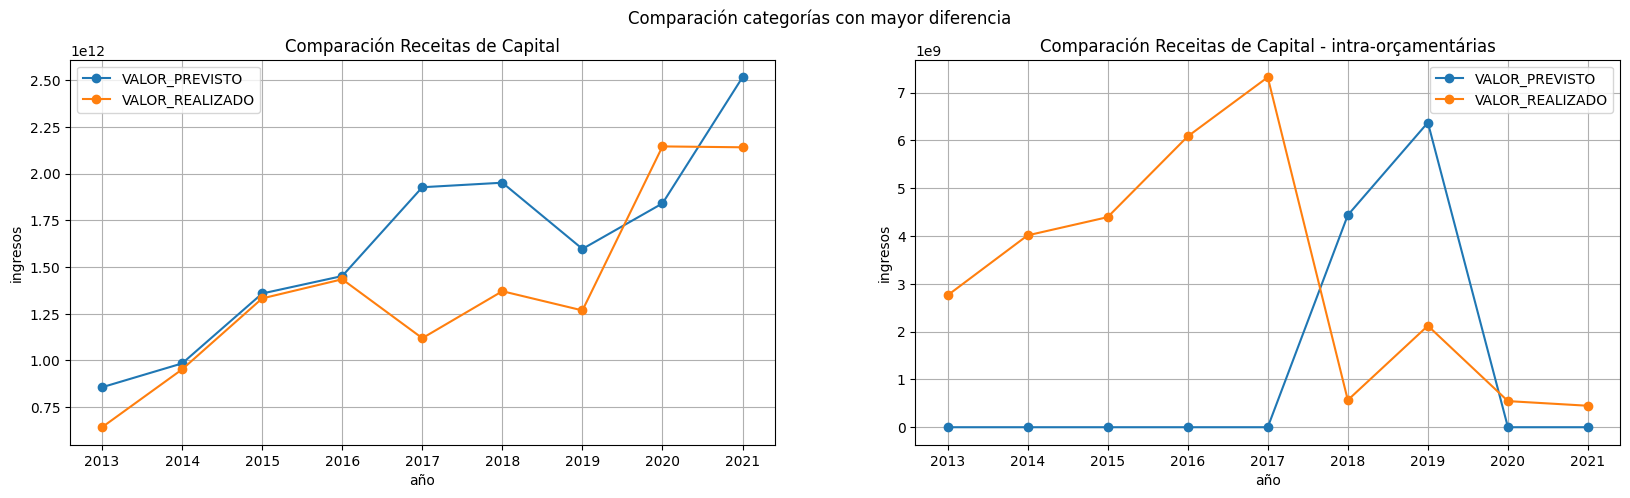

In [60]:
# Representamos estos dos nuevos dataframe en subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

axes[0].plot(valores_RC['año'], valores_RC['VALOR_PREVISTO'], marker='o', label='VALOR_PREVISTO') 
axes[0].plot(valores_RC['año'], valores_RC['VALOR_REALIZADO'], marker='o', label='VALOR_REALIZADO')  
axes[0].set_xlabel('año') 
axes[0].set_ylabel('ingresos') 
axes[0].set_title('Comparación Receitas de Capital') 
axes[0].legend()  
axes[0].grid(True)

fig.suptitle('Comparación categorías con mayor diferencia')

axes[1].plot(valores_RC_intra['año'], valores_RC_intra['VALOR_PREVISTO'], marker='o', label='VALOR_PREVISTO') 
axes[1].plot(valores_RC_intra['año'], valores_RC_intra['VALOR_REALIZADO'], marker='o', label='VALOR_REALIZADO')  
axes[1].set_xlabel('año') 
axes[1].set_ylabel('ingresos') 
axes[1].set_title('Comparación Receitas de Capital - intra-orçamentárias') 
axes[1].legend() 
axes[1].grid(True)

Podemos ver que en las Receitas de Capital, excepto en 2020, el valor previsto es mayor que el realizado, aunque en 2014, 2015 y 2016 son bastante similares. En general la tendencia es creciente, tanto el valor previsto como el realizado ha aumentado.  

En cuanto a Receitas de Capital - intra-orçamentárias, se puede ver lo mismo que numéricamente: el valor previsto es 0 salvo en los años 2018 y 2019. Respecto al valor realizado, hay una fuerte caída en 2018 que, aunque en 2019 sube un poco, vuelve a caer en 2020 y 2021.

## Fase 4: Visualización de Datos

- **Gráficos de Barras y Líneas:**

   - Crear gráficos que muestren la comparación entre ingresos previstos, lanzados y realizados para cada categoría.

In [61]:
# agrupamos por CATEGORIA ECONÔMICA y agregamos la suma de VALOR REALIZADO, VALOR PREVISTO ATUALIZADO y VALOR LANÇADO
valores_categoria_comparar = datos_brasil.groupby(["CATEGORIA ECONÔMICA"]).agg(
    VALOR_PREVISTO =("VALOR PREVISTO ATUALIZADO", "sum"), 
    VALOR_REALIZADO =("VALOR REALIZADO", "sum"), 
    VALOR_LANZADO=("VALOR LANÇADO", "sum")).reset_index()
valores_categoria_comparar

,CATEGORIA ECONÔMICA,VALOR_PREVISTO,VALOR_REALIZADO,VALOR_LANZADO
0,Receitas Correntes,1.354953e+13,1.290934e+13,5.377871e+12
1,Receitas Correntes - intra-orçamentárias,2.914850e+11,2.926518e+11,0.000000e+00
2,Receitas de Capital,1.448575e+13,1.240714e+13,3.813949e+06
3,Receitas de Capital - intra-orçamentárias,1.080841e+10,2.825084e+10,0.000000e+00
4,Sem informação,0.000000e+00,4.657000e+01,2.812348e+09


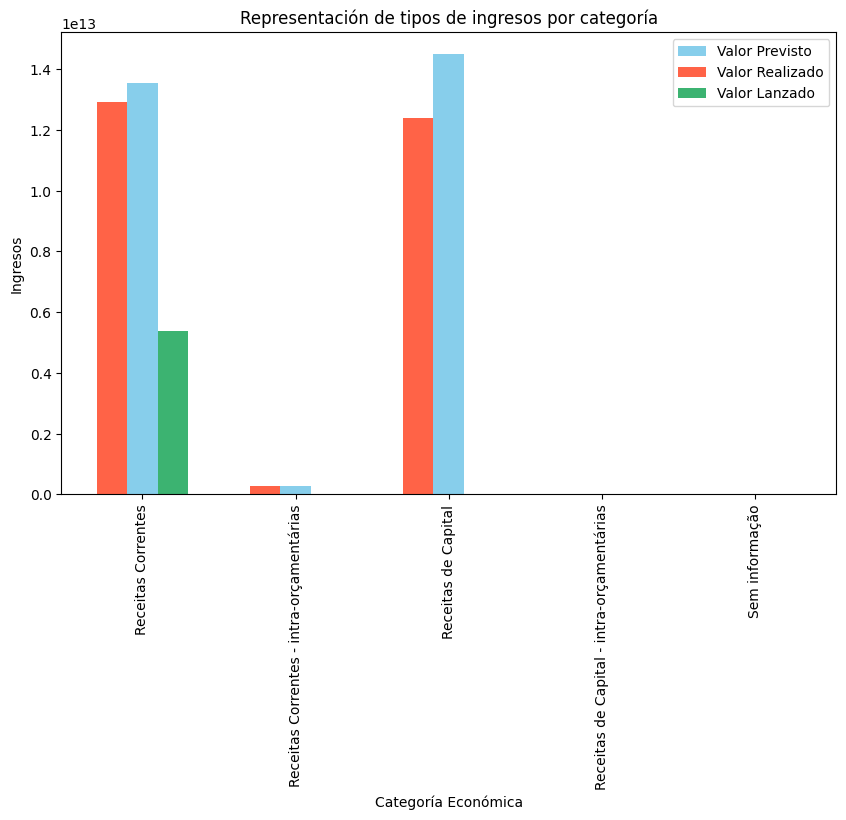

In [72]:
# Creamos posiciones de barras
bar_width = 0.2 # fijamos el ancho de las barras
# creamos una lista de posiciones con la longitud de una de las columnas
pos = list(range(len(valores_categoria_comparar['VALOR_PREVISTO']))) 
# configuramos las posiciones de cada barra respecto a la lista pos que hemos creado
pos1 = [p - bar_width for p in pos]
pos2 = [p + bar_width for p in pos]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos las barras
ax.bar(pos, valores_categoria_comparar['VALOR_PREVISTO'], width=bar_width, label='Valor Previsto', color="skyblue")
ax.bar(pos1, valores_categoria_comparar['VALOR_REALIZADO'], width=bar_width, label='Valor Realizado', color="tomato")
ax.bar(pos2, valores_categoria_comparar['VALOR_LANZADO'], width=bar_width, label='Valor Lanzado', color="mediumseagreen")

# Añadir etiquetas y título
ax.set_xlabel('Categoría Económica')
ax.set_ylabel('Ingresos')
ax.set_title('Representación de tipos de ingresos por categoría')
ax.set_xticks(pos)
ax.set_xticklabels(valores_categoria_comparar['CATEGORIA ECONÔMICA'], rotation=90)
ax.legend()

En Receitas Correntes y Receitas de Capital se puede ver que el valor previsto es mayor que el realizado, siendo esta diferencia mayo en el caso de Receitas de Capital. En cuanto al valor lanzado es mucho menor (inferior al 50%) para el caso de Receitas Correntes y nulo en el caso de Receitas de Capital.  
Para Receitas Correntes - intra-orçamentárias, las barras de valor previsto y realizado parecen prácticamente iguales, sin embargo no se aprecia bien por la escala del gráfico.

Como las Receitas Correntes y las Receitas de Capital son las que tienen valores más altos, no podemos apreciar bien el resto de categorías, por lo que representamos de nuevo las categorías minoritarias.


In [82]:
#filtramos el df para que muestre las categorias minoritarias
# sería hacer un .isin inverso, como no hay una función que lo haga en pandas, usamos el operador de negación ~ delante del filtro isin
valores_categoria_comparar_menos = valores_categoria_comparar[~valores_categoria_comparar["CATEGORIA ECONÔMICA"].isin(["Receitas Correntes", "Receitas de Capital"])]
valores_categoria_comparar_menos

,CATEGORIA ECONÔMICA,VALOR_PREVISTO,VALOR_REALIZADO,VALOR_LANZADO
1,Receitas Correntes - intra-orçamentárias,2.914850e+11,2.926518e+11,0.000000e+00
3,Receitas de Capital - intra-orçamentárias,1.080841e+10,2.825084e+10,0.000000e+00
4,Sem informação,0.000000e+00,4.657000e+01,2.812348e+09


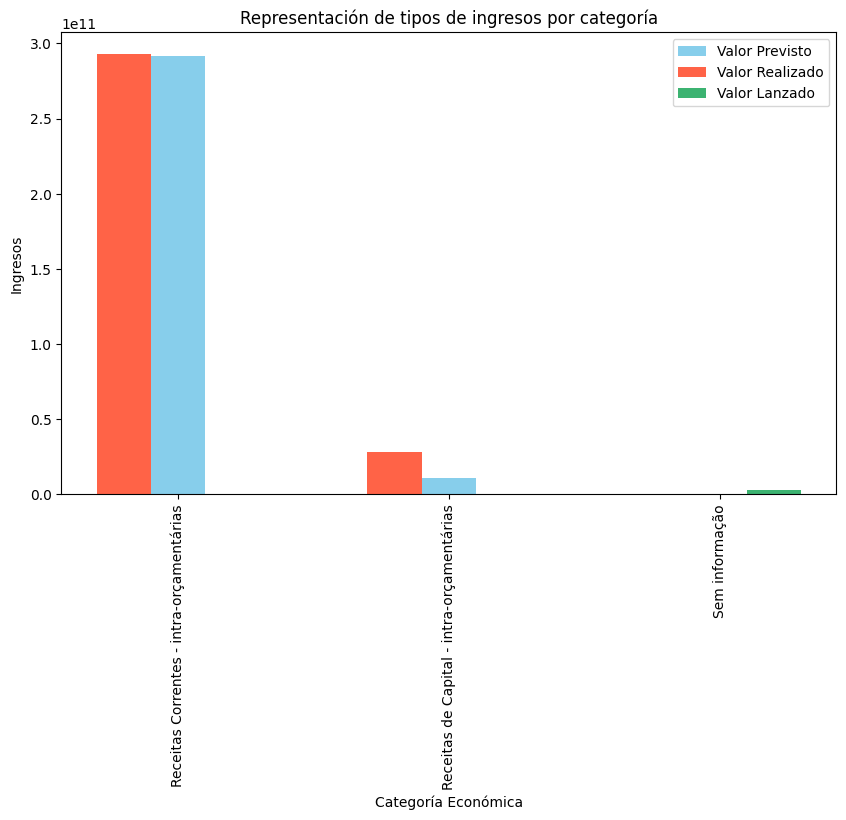

In [83]:
# Repetimos el gráfico con estos datos filtrados
# Creamos posiciones de barras
bar_width = 0.2 # fijamos el ancho de las barras
# creamos una lista de posiciones con la longitud de una de las columnas
pos = list(range(len(valores_categoria_comparar_menos['VALOR_PREVISTO']))) 
# configuramos las posiciones de cada barra respecto a la lista pos que hemos creado
pos1 = [p - bar_width for p in pos]
pos2 = [p + bar_width for p in pos]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos las barras
ax.bar(pos, valores_categoria_comparar_menos['VALOR_PREVISTO'], width=bar_width, label='Valor Previsto', color="skyblue")
ax.bar(pos1, valores_categoria_comparar_menos['VALOR_REALIZADO'], width=bar_width, label='Valor Realizado', color="tomato")
ax.bar(pos2, valores_categoria_comparar_menos['VALOR_LANZADO'], width=bar_width, label='Valor Lanzado', color="mediumseagreen")

# Añadir etiquetas y título
ax.set_xlabel('Categoría Económica')
ax.set_ylabel('Ingresos')
ax.set_title('Representación de tipos de ingresos por categoría')
ax.set_xticks(pos)
ax.set_xticklabels(valores_categoria_comparar_menos['CATEGORIA ECONÔMICA'], rotation=90)
ax.legend()

Aquí podemos comprobar que para Receitas Correntes - intra-orçamentárias, los valores realizado y previsto son muy similares, lo que sugiere que es la categoría que mejor se ejecuta, mientras que en Receitas Correntes y Receitas de Capital parece haber subejecución.  
En cuanto a valor lanzado, parece haber problemas, ya que suele ser nulo o muy inferior al previsto.  
Para Receitas de Capital - intra-orçamentárias es mayor el valor realizado que el previsto, sugiriendo una sobreejecución.

   - Graficar la evolución temporal de los ingresos realizados y previstos.

In [84]:
# agrupamos el df por  año y agregamos por la suma de VALOR PREVISTO ATUALIZADO y VALOR REALIZADO
valores_previsto_realizado = datos_brasil.groupby(["año"]).agg(VALOR_PREVISTO =("VALOR PREVISTO ATUALIZADO", "sum"), VALOR_REALIZADO =("VALOR REALIZADO", "sum")).reset_index()
valores_previsto_realizado 

,año,VALOR_PREVISTO,VALOR_REALIZADO
0,2013.0,2.174651e+12,1.893614e+12
1,2014.0,2.392129e+12,2.238551e+12
2,2015.0,2.878828e+12,2.665685e+12
3,2016.0,2.952696e+12,2.839712e+12
4,2017.0,3.414380e+12,2.558047e+12
5,2018.0,3.505648e+12,2.942388e+12
6,2019.0,3.261379e+12,2.991565e+12
7,2020.0,3.577147e+12,3.631449e+12
8,2021.0,4.180716e+12,3.876372e+12


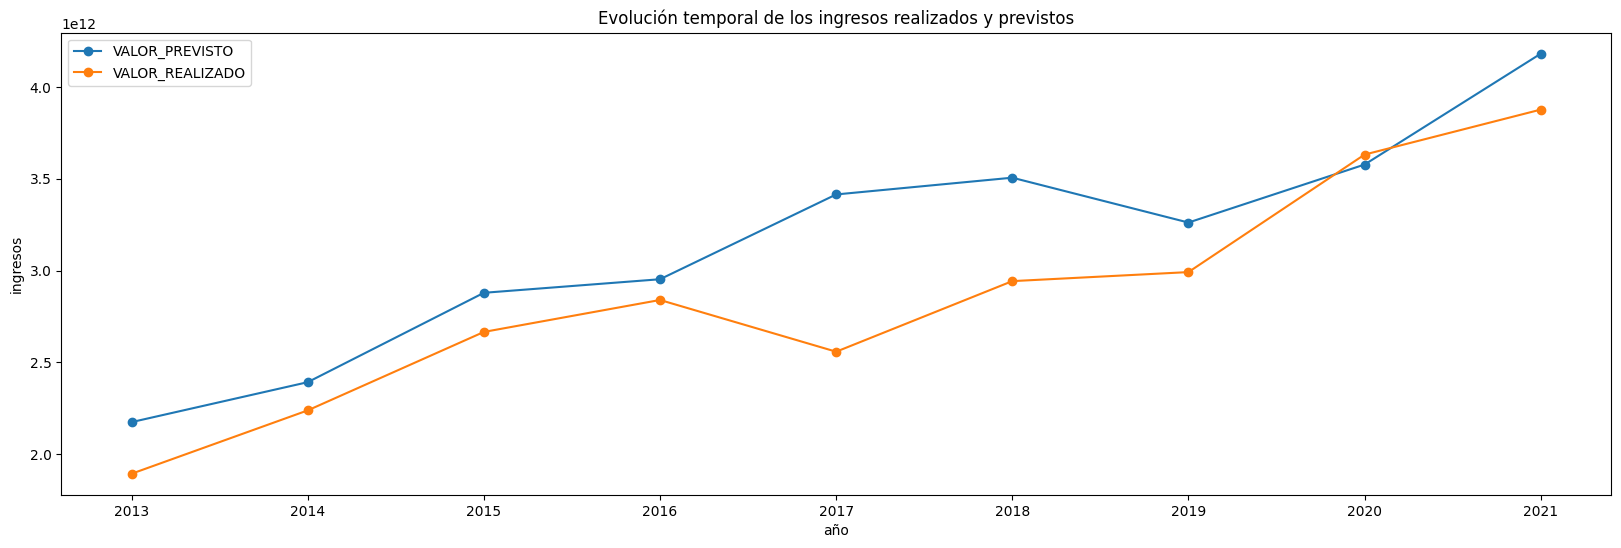

In [92]:
# Representamos este nuevo dataframe
plt.figure(figsize=(20, 6))
plt.plot(valores_previsto_realizado['año'], valores_previsto_realizado['VALOR_PREVISTO'], marker='o', label='VALOR_PREVISTO') 
plt.plot(valores_previsto_realizado['año'], valores_previsto_realizado['VALOR_REALIZADO'], marker='o', label='VALOR_REALIZADO')  
plt.xlabel('año') 
plt.ylabel('ingresos') 
plt.title('Evolución temporal de los ingresos realizados y previstos') 
plt.legend()  


En general la tendencia es ascendente, es decir, los ingresos han aumentado desde 2013. El valor previsto siempre ha sido mayor que el realizado expecto en 2020, que es menor, aunque muy poco. La diferencia entre valor previsto y valor realizado parece mantenerse más o menos constante hastra 2017, cuando esta diferencia aumenta mucho debido a lo que parece una caída en los ingresos realizados.

2. **Diagramas de Caja:**

   - Evaluar la dispersión de las diferencias entre los valores previstos y realizados en diferentes categorías.

<Axes: xlabel='diferencia_ingresos', ylabel='CATEGORIA ECONÔMICA'>

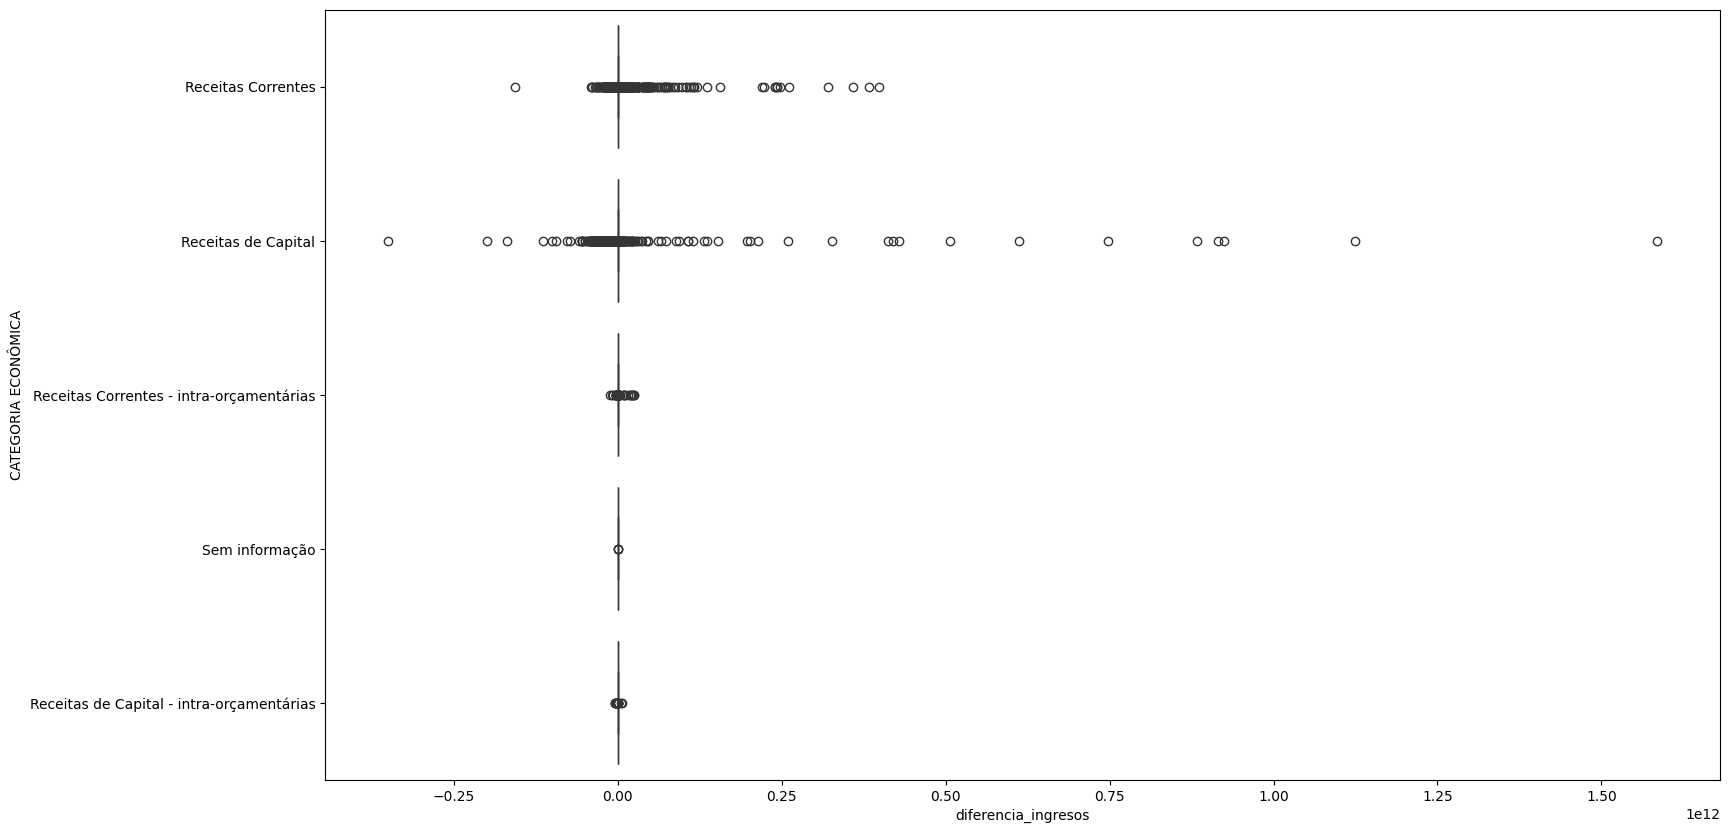

In [120]:
plt.figure(figsize=(18, 10))
sns.boxplot(x="diferencia_ingresos", y="CATEGORIA ECONÔMICA", data=datos_brasil, hue="CATEGORIA ECONÔMICA", palette='viridis')

Dado que la caja y los bigotes parecen estar unidos en una misma línea, podemos suponer que los valores mayoritarios en las diferencias son 0 o cercanos a 0 y que hay una gran cantidad de valores atípicos, especialmente en Receitas de Capital y, en menor medida en Receitas Correntes.  
Vamos a probar a filtrar reduciendo el rango de valores

In [129]:
# filtramos para obtener solo las diferencias de 10000, tanto positivas como negativas para poder ver la caja
datos_filtro= datos_brasil[datos_brasil["diferencia_ingresos"].between (-10000,10000)]

<Axes: xlabel='diferencia_ingresos', ylabel='CATEGORIA ECONÔMICA'>

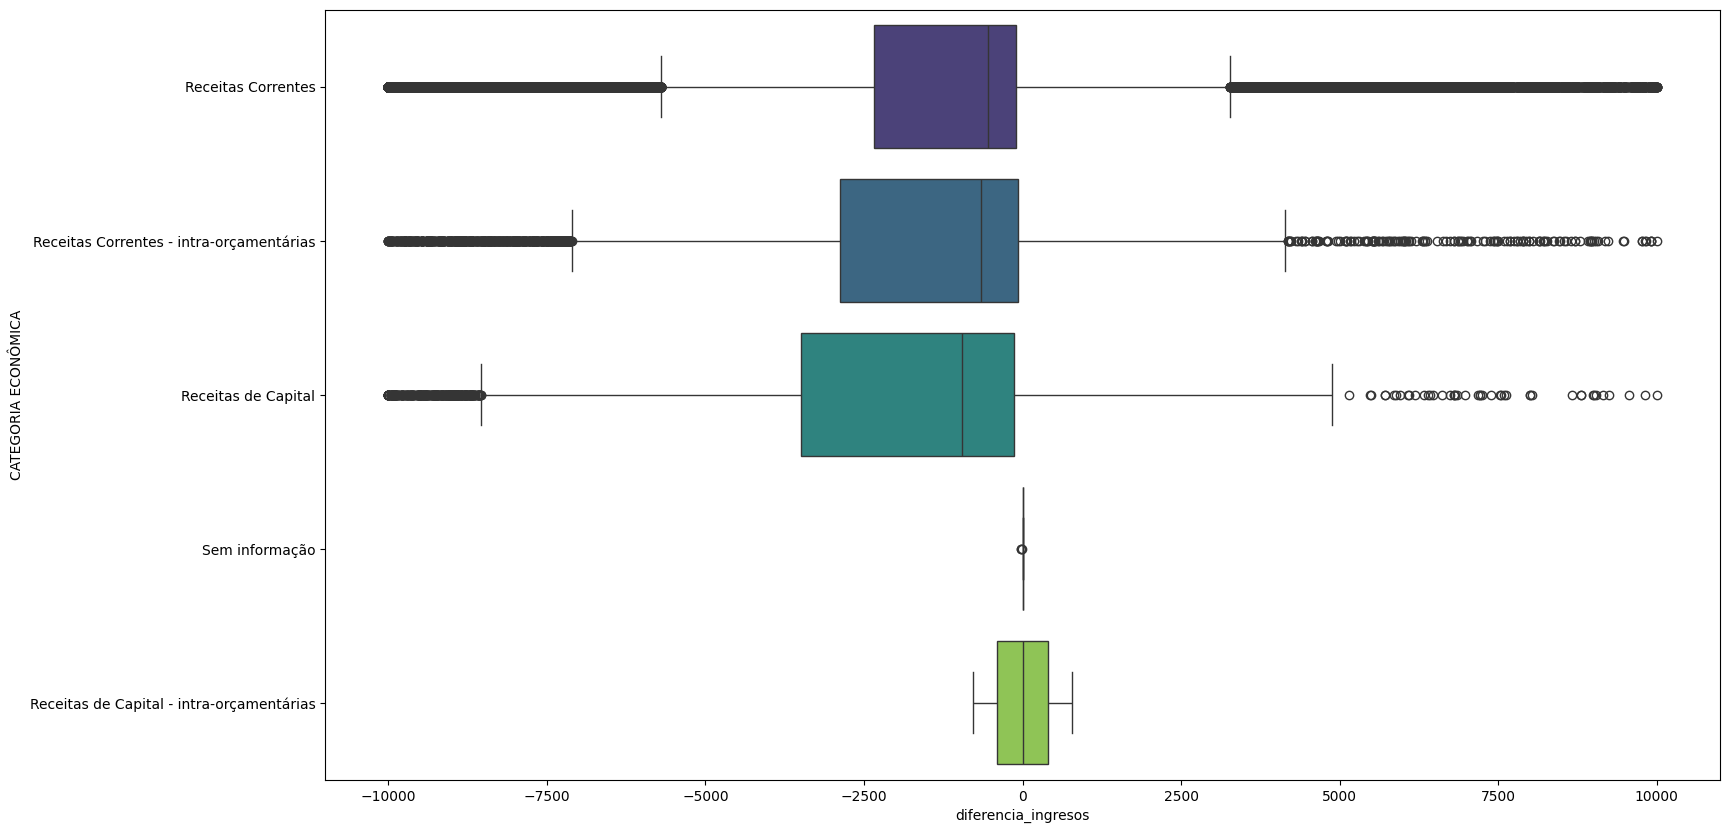

In [130]:
plt.figure(figsize=(18, 10))
sns.boxplot(x="diferencia_ingresos", y="CATEGORIA ECONÔMICA", data=datos_filtro, hue="CATEGORIA ECONÔMICA", palette='viridis')

Una vez reducido el rango, sí que podemos ver las cajas y bigotes para cada categoría, confirmando que sus valores son cercanos a 0 considerando el amplio rango de valores que encontramos en esa columna.